<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Python Notebook for Stock Market Analysis

- [API Reference]()
- [Reference]()

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="PSMA_toc"></a>

* [Table of Contents](#PSMA_toc)
    * [1. Abstract](#PSMA_page_1)
    * [2. Imported Libraries](#PSMA_page_2)
    * [3. Import the Dataset](#PSMA_page_3)
    * [4. Setting Notebook Options](#PSMA_page_4)
    * [5. Looking at the Data](#PSMA_page_5)
    * [6. Checking the Column Names](#PSMA_page_6)
    * [7. Cleaning the Column Names](#PSMA_page_7)
    * [8. Creating a new Cleaned Dataset](#PSMA_page_8)
    * [9. Counting Columns](#PSMA_page_9)
    * [10. Get Info about the Dataset](#PSMA_page_10)
    * [11. Get Descriptive Statistics about the Dataset](#PSMA_page_11)
    * [12. Counting Rows and Removing any NANs](#PSMA_page_12)
    * [13. Correlation Analysis](#PSMA_page_13)
    * [14. Principal Component Analysis (PCA)](#PSMA_page_14)
    * [15. Group Comparison](#PSMA_page_15)
    * [16. Fishers Discriminant Analysis and Support Vector Machines (SVM)](#PSMA_page_16)
    * [17. Groupby Function](#PSMA_page_17)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 1 - Abstract <a class="anchor" id="PSMA_page_1"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 2 - Import Libraries <a class="anchor" id="PSMA_page_2"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [ ]:
import matplotlib.pyplot as plt 
import quandl 
import pandas as pd

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 3 - Import Dataset <a class="anchor" id="PSMA_page_3"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [3]:
quandl.ApiConfig.api_key ="PDvy6a-Ay5gmtgyQwyLV"

In [4]:
data = quandl.get("CFTC/13874U_FO_L_OLD_CR")  # Retrieve S&P500 

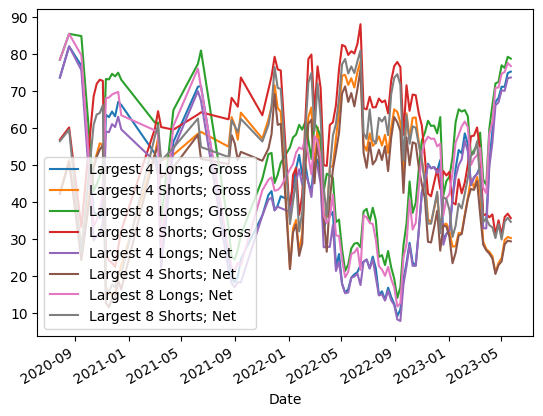

In [5]:
data.plot() 
plt.show()

In [14]:
Consumer_Staples = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Consumer_Staples.csv")

In [15]:
Consumer_Staples.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 26, 2023",761.29,765.94,758.95,764.84,764.84,"147,625,000"
1,1,"May 25, 2023",762.06,764.78,756.94,762.16,762.16,"165,712,800"
2,2,"May 24, 2023",773.43,773.68,767.33,768.05,768.05,"128,804,700"
3,3,"May 23, 2023",776.58,776.58,771.93,773.06,773.06,"137,650,500"
4,4,"May 22, 2023",789.80,789.80,777.94,778.59,778.59,"134,853,500"


In [16]:
Communication_Services = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Communication_Services.csv")

In [17]:
Communication_Services.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 26, 2023",207.37,211.14,206.53,210.92,210.92,"307,898,400"
1,1,"May 25, 2023",206.48,209.82,206.39,207.37,207.37,"399,977,700"
2,2,"May 24, 2023",207.14,207.45,205.20,206.48,206.48,"253,331,100"
3,3,"May 23, 2023",210.85,210.90,207.73,207.73,207.73,"272,091,700"
4,4,"May 22, 2023",208.37,212.50,208.37,210.85,210.85,"263,667,000"


In [18]:
Energy = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Energy.csv")

In [19]:
Energy.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 26, 2023",604.77,610.46,599.85,602.51,602.51,"138,167,500"
1,1,"May 25, 2023",616.43,616.43,599.83,604.77,604.77,"162,236,500"
2,2,"May 24, 2023",613.23,621.22,611.35,616.43,616.43,"137,879,400"
3,3,"May 23, 2023",606.94,620.61,606.94,613.23,613.23,"139,637,800"
4,4,"May 22, 2023",609.30,613.02,606.52,606.94,606.94,"136,684,400"


In [22]:
Industrials = pd.read_csv("C:/Users/Owner/Documents/GitHub/SmartInvest/Industrials.csv")

In [23]:
Industrials.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 26, 2023",826.17,833.27,825.80,830.39,830.39,"153,779,000"
1,1,"May 25, 2023",821.42,826.06,817.01,824.03,824.03,"193,548,900"
2,2,"May 24, 2023",829.92,829.93,820.46,821.53,821.53,"174,945,800"
3,3,"May 23, 2023",838.55,840.97,830.95,832.07,832.07,"180,217,300"
4,4,"May 22, 2023",843.31,847.44,835.76,842.45,842.45,"159,481,000"
